In [1]:
import pandas as pd
import numpy as np
from seaborn import load_dataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [3]:
# load the data 

df = load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [19]:
cols_to_remove = df.columns[8:].append(df.columns[[4,5]])

In [21]:
# remove unecessary columns from the df

df.drop(columns=cols_to_remove,inplace=True)

df.head()

,survived,pclass,sex,age,fare,embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [23]:
# check for missing values in the data

df.isna().sum()

survived      0
pclass        0
sex           0
age         177
fare          0
embarked      2
dtype: int64

- The embarked column has only two missing values
- The age column has greater than 150 missing values

In [24]:
# data types of columns in the data

df.dtypes

survived      int64
pclass        int64
sex          object
age         float64
fare        float64
embarked     object
dtype: object

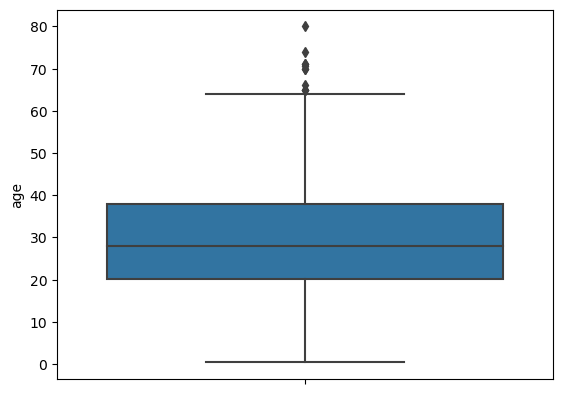

In [34]:
# check for outliers in the age column

sns.boxplot(data=df,y='age')
plt.show()

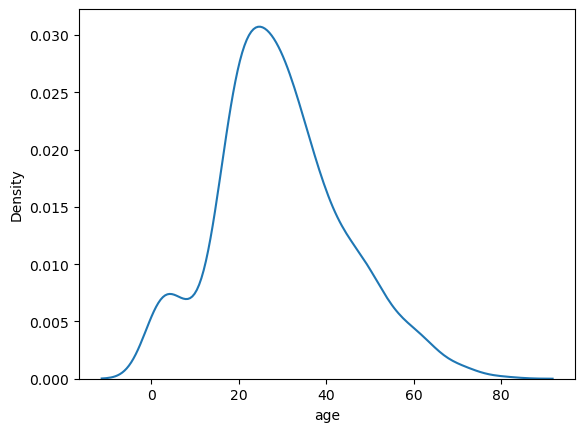

In [35]:
# distribution of the age column

sns.kdeplot(data=df,x='age')
plt.show()

In [25]:
# split the data into X and y

X = df.drop(columns=['survived'])

y = df['survived']

In [26]:
# do the train test split of the data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)

print('The shape of the training data is',X_train.shape)
print('The shape of the test data is',X_test.shape)

The shape of the training data is (712, 5)
The shape of the test data is (179, 5)


In [30]:
# check for the missing values in the train and test data

train_missing = X_train.isna().sum()

test_missing = X_test.isna().sum()

print(train_missing,test_missing,sep='\n'*3)

pclass        0
sex           0
age         144
fare          0
embarked      2
dtype: int64


pclass       0
sex          0
age         33
fare         0
embarked     0
dtype: int64


In [31]:
# create the imputer class

class MyImputer:

    def __init__(self,mapper):
        self.X = X
        self.mapper = mapper
        self.imputer_objs = {}
        
        for key in mapper:
            self.imputer_objs[key] = SimpleImputer(strategy=mapper.get(key))

    def fit(self):
        pass

In [33]:
mapper = {'age':'median','embarked':'most_frequent'}

MyImputer(X_train,mapper)

{'age': SimpleImputer(strategy='median'), 'embarked': SimpleImputer(strategy='most_frequent')}
